# Low-level implementation of a Linear Regression model in TensorFlow


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf  

random_seed = 0
np.random.seed(random_seed)

## Let's simulate a linear relationship between two variables

In [2]:
W_true = 20  # slope
b_true = 5  # intercept

x = np.linspace(0.18, 1.20, 100)
y = W_true * x + b_true + np.random.randn(*x.shape) * 2

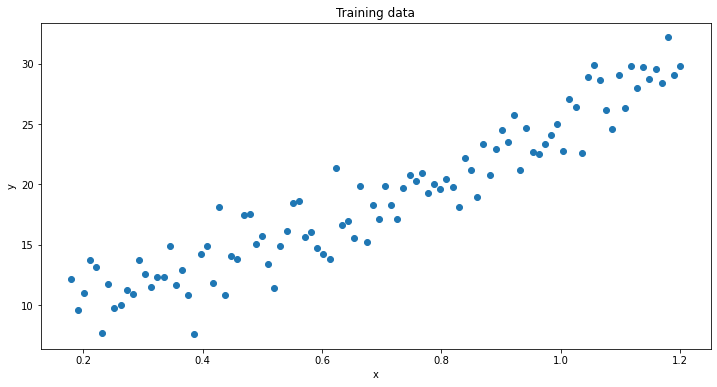

In [3]:
plt.figure(figsize=(12,6))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title('Training data')
plt.show()

## Let's define a linear model

In [4]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name='W')
        self.bias = tf.Variable(np.random.randn(), name='b')

    def __call__(self, x):
        return self.weight * x + self.bias

## Loss function: MSE

In [5]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

## The training routine consists of gradient descent optimization

In [6]:
def train(linear_model, x, y, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y, y_pred)

    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])

    linear_model.weight.assign_sub(learning_rate * d_weight)
    linear_model.bias.assign_sub(learning_rate * d_bias)

## Train ...

In [7]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100
lr = 0.5

for epoch in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, learning_rate=lr)

    print(f"Epoch # {epoch}: loss -> {real_loss.numpy()}")

Epoch # 0: loss -> 391.01153564453125
Epoch # 1: loss -> 106.8003921508789
Epoch # 2: loss -> 33.65753173828125
Epoch # 3: loss -> 14.56436538696289
Epoch # 4: loss -> 9.342865943908691
Epoch # 5: loss -> 7.708751201629639
Epoch # 6: loss -> 7.026454925537109
Epoch # 7: loss -> 6.617806434631348
Epoch # 8: loss -> 6.305862903594971
Epoch # 9: loss -> 6.042309761047363
Epoch # 10: loss -> 5.812087535858154
Epoch # 11: loss -> 5.6089582443237305
Epoch # 12: loss -> 5.429205417633057
Epoch # 13: loss -> 5.270005702972412
Epoch # 14: loss -> 5.128972053527832
Epoch # 15: loss -> 5.004026412963867
Epoch # 16: loss -> 4.8933281898498535
Epoch # 17: loss -> 4.795252323150635
Epoch # 18: loss -> 4.70836067199707
Epoch # 19: loss -> 4.63137674331665
Epoch # 20: loss -> 4.563172340393066
Epoch # 21: loss -> 4.502744674682617
Epoch # 22: loss -> 4.4492082595825195
Epoch # 23: loss -> 4.401775360107422
Epoch # 24: loss -> 4.3597517013549805
Epoch # 25: loss -> 4.322518825531006
Epoch # 26: loss ->

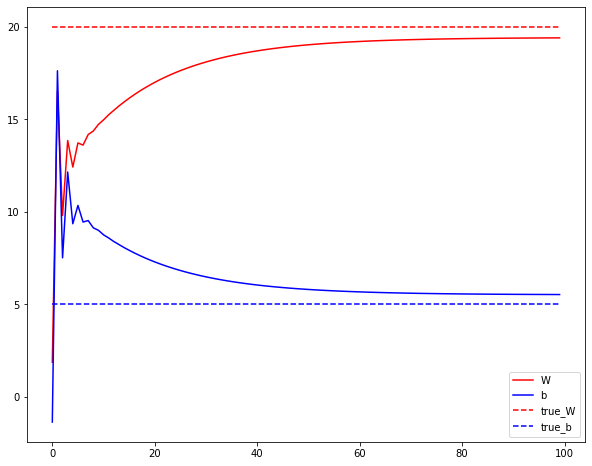

In [8]:
plt.figure(figsize=(10,8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true_W', 'true_b'])
plt.show()

In [9]:
print(f"Expected W={W_true}, b={b_true}")
print(f"Learned W={linear_model.weight.numpy()}, b={linear_model.bias.numpy()}")

Expected W=20, b=5
Learned W=19.397905349731445, b=5.53588342666626


## Results

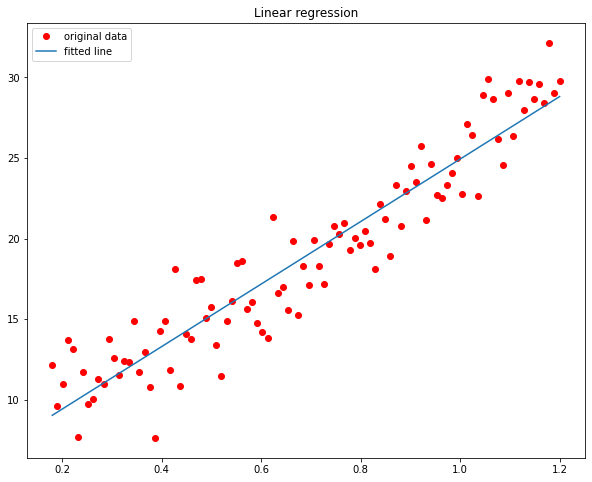

In [10]:
plt.figure(figsize=(10,8))

plt.plot(x, y, 'ro', label='original data')
plt.plot(x, linear_model(x), label='fitted line')

plt.title('Linear regression')

plt.legend()
plt.show()